# Explore here

In [3]:
# Your code here
import pandas as pd

test_data = pd.read_csv("/workspaces/gradient-boosting/data/processed/clean_test.csv")
train_data = pd.read_csv("/workspaces/gradient-boosting/data/processed/clean_train.csv")
print(test_data.head())
print(train_data.head())

   Unnamed: 0  Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  \
0           0          6.0     98.0    190.0  34.0                     0.430   
1           1          2.0    112.0      0.0  35.7                     0.148   
2           2          2.0    108.0      0.0  30.8                     0.158   
3           3          8.0    107.0      0.0  24.6                     0.856   
4           4          7.0    136.0      0.0  29.9                     0.210   

    Age  Outcome  
0  43.0        0  
1  21.0        0  
2  21.0        0  
3  34.0        0  
4  50.0        0  
   Unnamed: 0  Pregnancies  Glucose  Insulin   BMI  DiabetesPedigreeFunction  \
0           0          2.0     84.0      0.0   0.0                     0.304   
1           1          9.0    112.0      0.0  28.2                     1.282   
2           2          1.0    139.0     83.0  28.7                     0.654   
3           3          0.0    161.0      0.0  21.9                     0.254   
4    

In [4]:
# Splitting train data into features (X_train) and target variable (y_train)
X_train = train_data.drop(columns=['Outcome'])  # Features (all columns except 'Outcome')
y_train = train_data['Outcome']                 # Target variable ('Outcome' column)

# Splitting test data into features (X_test) and target variable (y_test)
X_test = test_data.drop(columns=['Outcome'])  # Features (all columns except 'Outcome')
y_test = test_data['Outcome']                 # Target variable ('Outcome' column)

In [5]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 42)
print('Parameters currently in use:\n')
print(xgb.get_params())

Parameters currently in use:

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


#### Random Hyperparameter Grid + Random Search Training

In [6]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in XGBoost
n_estimators = [20, 40, 80, 100, 120, 150, 200]
# Maximum depth of a tree
max_depth = [5, 10, 15, 20]
max_depth.append(None)
# Minimum child weight (minimum sum of instance weight (hessian) needed in a child)
min_child_weight = [1, 2, 4, 6, 8, 10]
# Subsample ratio of the training instances
subsample = [0.6, 0.7, 0.8, 0.9, 1.0]
# Subsample ratio of columns when constructing each tree
colsample_bytree = [0.6, 0.7, 0.8, 0.9, 1.0]
# Learning rate (shrinkage rate)
learning_rate = [0.01, 0.02, 0.1, 0.2, 0.3, 0.8]

# Create the random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_child_weight': min_child_weight,
    'subsample': subsample,
    'colsample_bytree': colsample_bytree,
    'learning_rate': learning_rate
}

# Initialize XGBoost classifier
xgb = XGBClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
xgb_random.fit(X_train, y_train)  # Replace X_train and y_train with your training data

# Print the best parameters found
print(xgb_random.best_params_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=15, min_child_weight=6, n_estimators=150, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=15, min_child_weight=6, n_estimators=150, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.9, learning_rate=0.3, max_depth=15, min_child_weight=6, n_estimators=150, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=80, subsample=0.6; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=80, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=None, min_child_weight=1, n_estimators=120, subsample=0.6; total t

In [7]:
xgb_random.best_params_

{'subsample': 0.9,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 10,
 'learning_rate': 0.1,
 'colsample_bytree': 0.6}

#### Results

In [8]:

def evaluate(model_selected, test_features, test_labels):
    predictions = model_selected.predict(test_features)
    errors = abs(predictions - test_labels)
    
    # Exclude zero or very small values from test_labels
    test_labels_nonzero = test_labels[test_labels != 0]
    
    # Calculate MAPE with error handling for division by zero or NaN values
    if len(test_labels_nonzero) > 0:
        mape = 100 * np.mean(errors / test_labels_nonzero)
        accuracy = 100 - mape
    else:
        # Handle case when test_labels contain only zeros or very small values
        mape = np.nan
        accuracy = np.nan
    
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


base_model = XGBClassifier(random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

best_random = xgb_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.2597 degrees.
Accuracy = 65.45%.
Model Performance
Average Error: 0.2403 degrees.
Accuracy = 69.09%.
Improvement of 5.56%.


#### Grid Search with Cross Validation

In [11]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Define ranges for hyperparameters to further fine-tune the model
param_grid = {
    'n_estimators': [100, 150, 200, 250],  # Vary around the best value
    'min_child_weight': [5, 6, 7, 8, 9],  # Vary around the best value
    'max_depth': [8, 9, 10, 11, 12],  # Vary around the best value
    'subsample': [0.8, 0.9, 1.0],  # Vary around the best value
    'colsample_bytree': [0.5, 0.6, 0.7],  # Vary around the best value
    'learning_rate': [0.05, 0.1, 0.15],  # Vary around the best value
}

# Create a based model
xgb = XGBClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)


In [13]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - random_accuracy) / random_accuracy))

Fitting 3 folds for each of 2700 candidates, totalling 8100 fits
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.5, learning_rate=0.05, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.9; to

##### A significant decrease in performance indicates we have reached diminishing returns for hyperparameter tuning. We could continue, but the returns would be minimal at best.

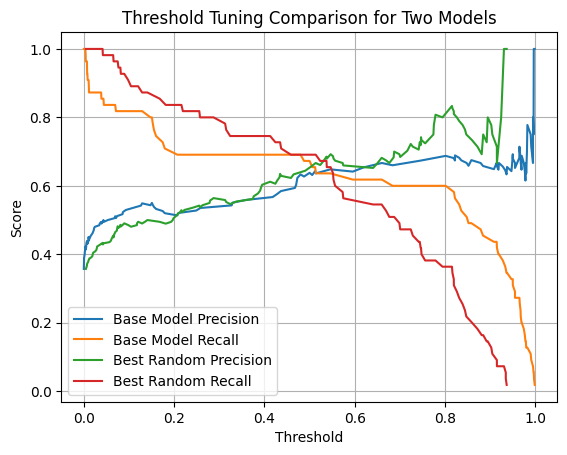

In [14]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

y_probs_bm = base_model.predict_proba(X_test)[:, 1]
y_probs_br = best_random.predict_proba(X_test)[:, 1]

# Calculate precision and recall for different thresholds for both models
precision_bm, recall_bm, thresholds_bm = precision_recall_curve(y_test, y_probs_bm)
precision_br, recall_br, thresholds_br = precision_recall_curve(y_test, y_probs_br)

# Plot precision-recall curve for both models
plt.plot(thresholds_bm, precision_bm[:-1], label='Base Model Precision')
plt.plot(thresholds_bm, recall_bm[:-1], label='Base Model Recall')
plt.plot(thresholds_br, precision_br[:-1], label='Best Random Precision')
plt.plot(thresholds_br, recall_br[:-1], label='Best Random Recall')

plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning Comparison for Two Models')
plt.legend()
plt.grid(True)
plt.show()